In [79]:
import pandas as pd
import numpy as np
import glob, pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load train set on cesium format
pref=''
cs_ = glob.glob(f'../data/{pref}training_cesium_curves/*.pkl')
oids_ = glob.glob(f'../data/{pref}training_cesium_curves/*.npy')

ts_a = []
ms_a = []
es_a = []
ds_a = []
oids_a = []

for c_, o_ in zip(cs_, oids_):
    with open(c_, 'rb') as fp:
        full_c=pickle.load(fp)
    oids_a.append(np.load(o_))
    ts_a.extend(full_c[0])
    ms_a.extend(full_c[1])
    es_a.extend(full_c[2])
    ds_a.extend(full_c[3])
oids_a = np.hstack(oids_a)

# Load metadata and target/pred info
meta = pd.read_csv(f'../data/{pref}training_set_metadata.csv')

In [59]:
meta['target'].value_counts()

90    2313
42    1193
65     981
16     924
15     495
62     484
88     370
92     239
67     208
52     183
95     175
6      151
64     102
53      30
Name: target, dtype: int64

<Figure size 432x288 with 0 Axes>

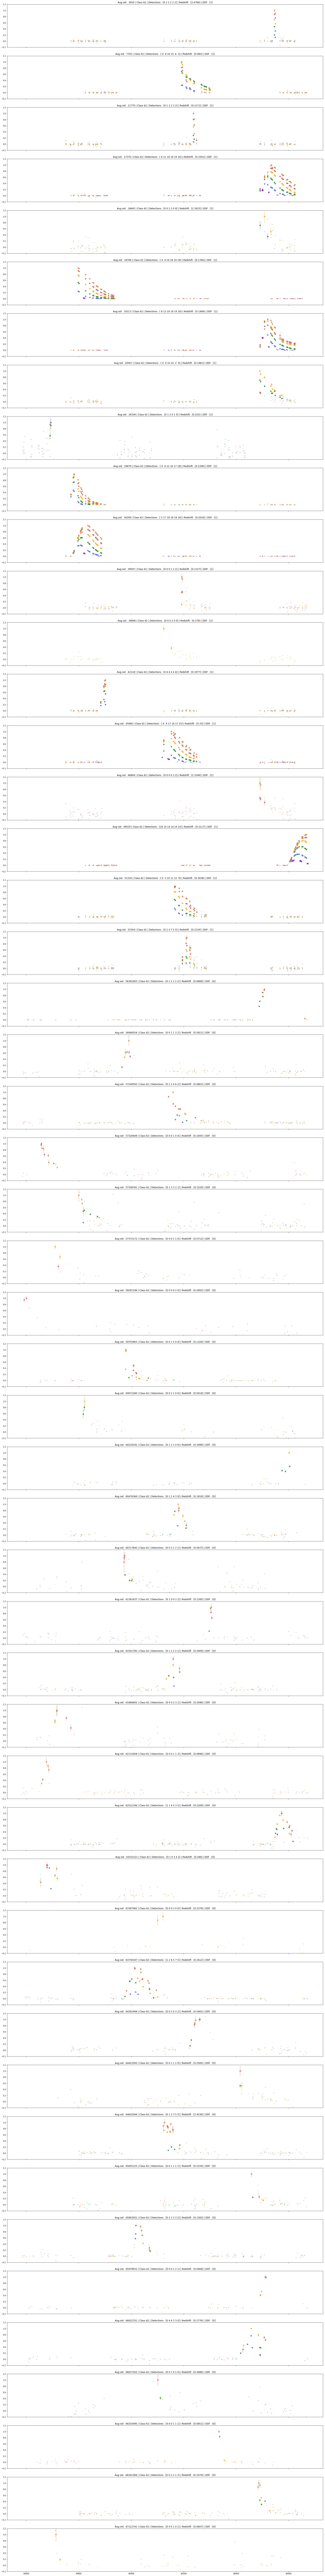

In [81]:
'''
SAMPLE CURVES SAME CLASS
'''

# Select sn class
sn_class = 62

# Select number of curves to plot
N_CURVES = 50

# Plt confs
plt.close('all')
plt.cla()
plt.clf()

f, axs = plt.subplots(N_CURVES, 1, sharex=True, sharey=False, figsize=(30,N_CURVES*5))
colors = ['darkorchid', 'royalblue', 'forestgreen', 'orange', 'indianred', 'peru']

sn_oids = meta.loc[meta['target']==sn_class,'object_id'].values
mask = np.arange(0, len(ts_a))[np.isin(oids_a, sn_oids)]
ts = [ts_a[i] for i in mask]
ms = [ms_a[i] for i in mask]
es = [es_a[i] for i in mask]
ds = [ds_a[i] for i in mask]
oids = oids_a[mask]

for j, (tt, mm, ee, dd, oidd) in enumerate(zip(ts[:N_CURVES], ms[:N_CURVES], es[:N_CURVES], ds[:N_CURVES], oids[:N_CURVES])):

    # Determine scaling factor
    m_max = []
    t_max = []
    for band_num, (t,m,e,d) in enumerate(zip(tt,mm,ee,dd)):

        if np.sum(d) > 0:
            m_max.append(np.max(m[d.astype(bool)]))
            t_max.append(t[d.astype(bool)][np.argmax(m[d.astype(bool)])])

    m_max = np.max(m_max)
    t_max = np.min(t_max)

    det_count = np.zeros(6)
    for band_num, (t,m,e,d) in enumerate(zip(tt,mm,ee,dd)):

        det_count[band_num] = np.sum(d)
        if det_count[band_num] > 0:

            # Detection mask
            s=40
            size_m = np.ones(len(d))*s
            size_m[np.logical_not(d.astype(bool))] *= .1
            
            axs[j].scatter(t, m/m_max, s=size_m, c=colors[band_num], alpha=0.75, marker=None, cmap=None, norm=None, vmin=None, vmax=None)
            axs[j].errorbar(t[d.astype(bool)], m[d.astype(bool)]/m_max, yerr=e[d.astype(bool)]/m_max, fmt='.', c=colors[band_num], alpha=0.6)
    rs = meta.loc[meta['object_id']==oidd,'hostgal_photoz'].values
    rs = np.unique(rs)
    ddf = meta.loc[meta['object_id']==oidd,'ddf'].values
    ddf = np.unique(ddf)
    aug_str = 'YES' if oidd % 10 > 0 else 'NO'
    axs[j].set_title(f'Aug oid : {oidd:d} | Class {sn_class} | Detections : {det_count.astype(int)} | Redshift : {rs} | DDF : {ddf}')
    axs[j].set_ylim(-0.2,1.2)
    #axs[j].set_xlim(-50, 300)
f.savefig(f'../edas/train{sn_class:d}_{pref}.png')

In [26]:
aoids = np.load('../data/aug_training_cesium_curves/aug_train_oids.npy')

In [27]:
aoids[-5:]

array([130779836000000010, 130779836000000011, 130779836000000012,
       130779836000000013, 130779836000000014], dtype=uint64)